<a href="https://colab.research.google.com/github/aghababaei-alireza/AI_Darsman/blob/main/Semester%206%20-%20Deep%20Learning/Learn/Part4-ConvolutionalNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<span dir="rtl" style="font-family:B Nazanin" align="right">
    <h1>فصل ششم: یادگیری عمیق</h1>
    <h2>بخش چهارم: شبکه‌های عصبی کانولوشن یا Convolutional neural network یا CNN</h2>
</span>

<p style="font-family:B Nazanin" dir="rtl">
    در این بخش یکی از مهم‌ترین انواع شبکه‌های عصبی یعنی شبکه‌های عصبی کانولوشن (CNN) را بررسی می‌کنیم. اما قبل از آن تعدادی از مفاهیمی که در این بخش به آن نیاز داریم را یاد می‌گیریم.
</p>

<p style="font-family:B Nazanin" dir="rtl">
    <b>محو گرادیان یا Vanishing Gradient:</b><br>
    محو گرادیان یکی از مشکلاتی است که ممکن است در همه مدل‌های شبکه عصبی اتفاق بیفتد و به حالتی می‌گویند که در مقادیر گرادیان‌ها در طول فرایند یادگیری به تدریج کم می‌شود و به صفر میل می‌کند. این اتفاق معمولا در اثر استفاده از توابع فعال‌سازی مانند Sigmoid یا Tanh در لایه‌های اولیه ممکن است به وجود آید که در اثر آن به‌روزشدن وزن‌ها در لایه‌های ابتدایی در فرایند BackPropagation یا اتفاق نمی‌افتد یا خیلی دیر اتفاق می‌افتد و زمانی که وزن‌ها به‌روز نشوند، فرایند یادگیری انجام نمی‌شود.
</p>

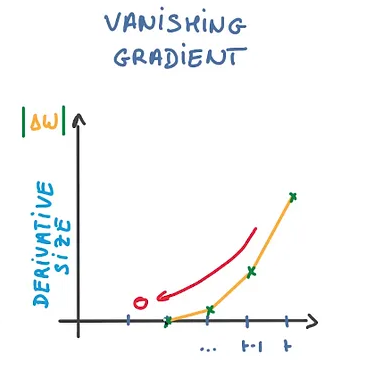

<p style="font-family:B Nazanin" dir="rtl">
    <b>انفجار گرادیان یا Exploding Gradient:</b><br>
    انفجار گرادیان زمانی اتفاق می‌افتد که مقادیر گرادیان‌ها در طول فرایند یادگیری بیش از حد زیاد می‌شود. این اتفاق در شبکه‌های خیلی عمیق، مثلا شبکه‌های RNN که توالی‌های طولانی رخ می‌دهد، به وجود می‌آید. در این حالت که گرادیان بیش از حد بزرگ می‌شود، مقادیر وزن‌ها نیز خیلی زیاد می‌شود و اگر وزن‌ها خیلی زیاد شوند، می‌گوییم مدل ناپایدار می‌شود.
</p>

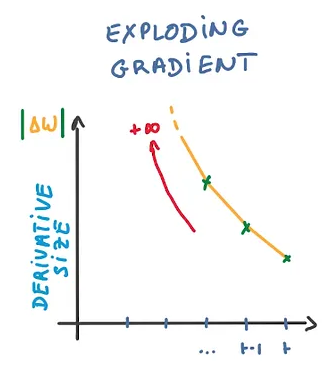

<p style="font-family:B Nazanin" dir="rtl">
    <b>روش‌های مقابله با محو گرادیان:</b><br>
    ** استفاده از توابع فعال‌ساز مناسب مانند ReLU و PReLU و LReLU: همان طور که گفتیم یکی از عوامل ایجاد محو گرادیان استفاده از توابع فعال‌سازی مانند Sigmoid یا Tanh است. پس استفاده از توابع فعال‌ساز از خانواده ReLU می‌تواند این مشکل را حل کند. <br>
    ** استفاده از Skip Connections یا Shortcut Connections: یک تکنیک است که در شبکه‌های عصبی عمیق یک مسیر مستقیم بین ورودی و خروجی دو یا چند لایه ایجاد می‌کند. مثلا خروجی یک لایه با خروجی چند لایه بعدتر از خود مستقیما جمع شود و لایه‌های مابین این دو لایه در نظر گرفته نشود. در این صورت گرادیان‌ها می‌توانند از طریق مسیر مستقیم و بدون کاهش به لایه‌های ابتدایی برگردند و کاهش گرادیان کمتر اتفاق می‌افتد. بنابراین وقتی مسیر مستقیم ایجاد می‌شود، شبکه می‌تواند تغییرات کوچک‌تر و ظریف‌تر را بهتر یاد بگیرد. این تکنیک در شبکه‌های پیشرفته‌تر مانند ResNet و ... در ادامه بیشتر توضیح داده خواهد شد.<br>
    ** طراحی معماری‌های مناسب‌تر برای شبکه‌های عصبی مانند Transformer و LSTM و ResNet<br>
    ** استفاده از نرمال‌سازی دسته‌ای یا Batch Normalization: در ادامه مفصل توضیح داده خواهد شد.<br>
    ** مقداردهی اولیه وزن‌ها با روش‌هایی مثل Xavier Initialization یا He Initialization: در ادامه مفصل توضیح داده خواهد شد.
</p>

<p style="font-family:B Nazanin" dir="rtl">
    <b>نرمال‌سازی دسته‌ای یا Batch Normalization:</b><br>
    همان طور که می‌دانید در همه مسائل یادگیری از یادگیری ماشین تا یادگیری عمیق، همیشه از تکنیک‌های نرمال‌سازی داده‌های ورودی بهره می‌بریم تا فرایند یادگیری بهتر اتفاق بیفتد. اما نرمال‌سازی دسته‌ای فرایندی است که در یک تکنیک در یادگیری عمیق است که در هر لایه پیش از اعمال تابع فعال‌ساز، عمل نرمال‌سازی داده‌ها انجام می‌شود. این فرایند با نرمال‌سازی داده‌های ورودی متفاوت است. در حقیقت در هر لایه قبل از اینکه تابع فعال‌ساز رویی داده‌های آن لایه عملی انجام دهد، این داده‌ها نرمال می‌شوند. نرمال‌سازی نیز به این صورت انجام می‌شود که میانگین و انحراف معیار داده‌ها محاسبه می‌شود و داده‌ها طوری تغییر می‌کنند که میانگین آن‌ها صفر و انحراف معیار آن‌ها یک شود. این عمل باعث می‌شود تا داده‌ها در بازه مناسبی قرار بگیرند و تابع فعال‌ساز عملکرد بهتری روی این داده‌ها خواهد داشت. در نتیجه مشتق تابع فعال‌ساز روی این داده‌ها بزرگ‌تر می‌شود و یادگیری در لایه‌های ابتدایی شبکه نیز امکان‌پذیر می‌شود و عملا مشکل محو گرادیان از بین می‌رود. از طرف دیگر این کار از رشد بیش از حد گرادیان نیز می‌تواند جلوگیری کند و یکی از روش‌های مقابله با انفجار گرادیان نیز هست.
</p>

$$
\hat{x_i} = \frac{x_i - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}}
$$

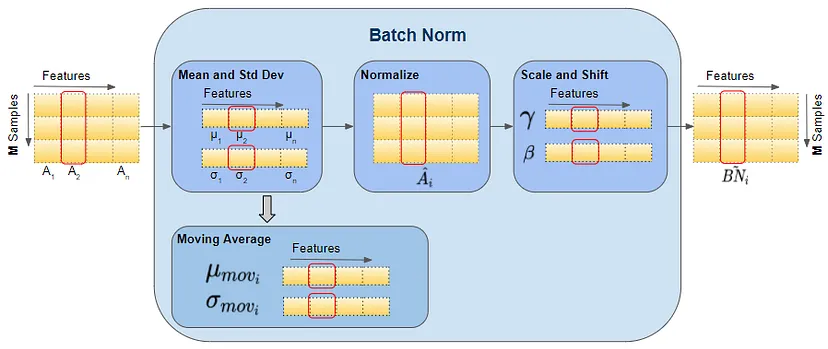